# Work for Project: Roshan Ravichandran

In [1]:
import math
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from typing import Dict
import csv
from typing import NamedTuple
from scipy.spatial import distance
from collections import defaultdict
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
Vector = List[float]

In [2]:
original = pd.read_csv("vehicles.csv", engine = "python", encoding = "latin1")
#########
usedcars = original[["price", "year", "manufacturer", "condition", "cylinders", "odometer", "title_status", "transmission"]]
#########

In [3]:
#Consider only values which are finite, aka have no NaN value
noNaN = np.isfinite(usedcars["odometer"]) & np.isfinite(usedcars["price"]) & np.isfinite(usedcars["year"])

# Bar Chart for relating the condition of a car and its price

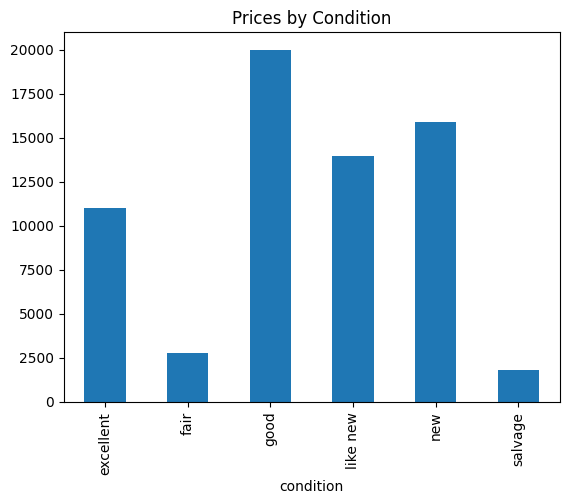

In [4]:
MeanPriceByCondition = usedcars.groupby(["condition"])["price"].median().plot(kind="bar", title="Prices by Condition")

#### As seen by this graph, the median value of a car seems to decrease as its condition gets worse, though one exception is the good category, which has a higher median price than the other categories even though its quality is not as good. This is most likely a result of most cars being listed as "good", at least compared to other variables

## Scatterplot between the inputs and the resulting price

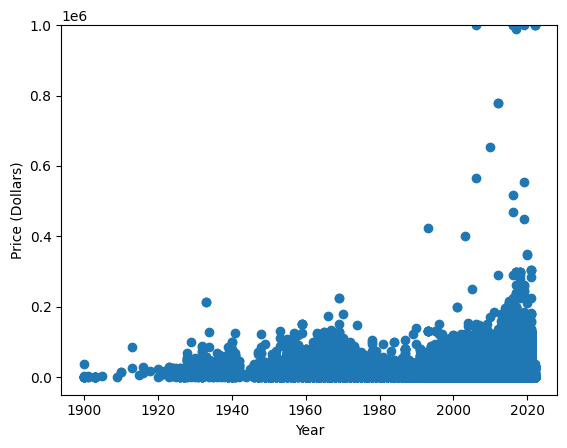

In [5]:
#Setting up a scatter plot between the year and the price
fig, ax = plt.subplots()
year = usedcars["year"]
price = usedcars["price"]
ax.scatter(year, price)
"""
# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
noNaN = np.isfinite(year) & np.isfinite(price)
m, b = np.polyfit(year[noNaN], price[noNaN], deg=1)
ax.plot(year, m * year + b, color="red")
"""
#labels
plt.xlabel("Year")
plt.ylabel("Price (Dollars)")

# setting the limits to make it easy to view
plt.ylim(-50000, 1000000)
plt.show()
#plt.xlim(1900, 2022)

#### Looking at this graph, there seems to be a slightly positive relationship between the year and the price. However, there are peaks and troughs within the dataset as time goes on

## Plotting the relationship between the mileage and the price

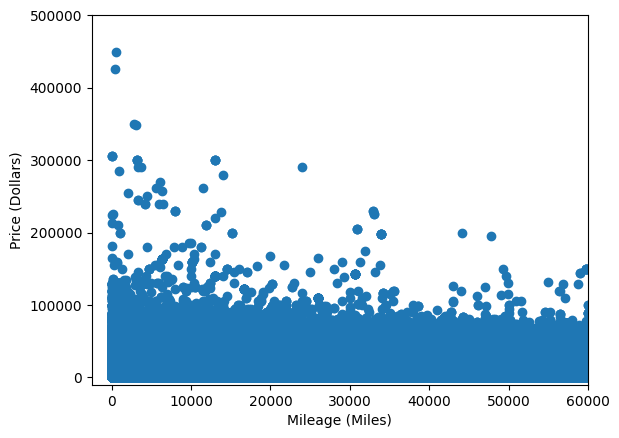

In [6]:
#Setting up a scatter plot between the mileage and the price
fig, ax = plt.subplots()
mileage = usedcars["odometer"]
price = usedcars["price"]

#plotting the line
ax.scatter(mileage, price)

# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
#noNaN = np.isfinite(mileage) & np.isfinite(price)
#m, b = np.polyfit(mileage[noNaN], price[noNaN], deg=1)
#ax.plot(mileage, m * mileage + b, color="red")

#labels
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (Dollars)")

# setting the limits to make it easy to view
plt.ylim(-10000, 500000)
plt.xlim(-2500, 60000)
plt.show()

#### Unlike the relationship between the year and the price, the relationship between the mileage of a car and its price is negative, meaning that the more a car has been driven, the lower its price becomes

## Heat Map of Correlations

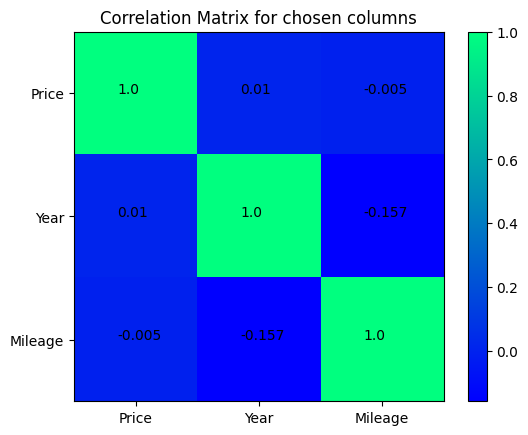

In [7]:


correlations = usedcars[["price", "odometer", "year"]][noNaN].corr()
#Setting the axes up
ax = plt.axes()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["Price", "Year", "Mileage"])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(["Price", "Year", "Mileage"])

#Setting the title
plt.title("Correlation Matrix for chosen columns")
plt.imshow(correlations, cmap="winter")
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.annotate(str(round(correlations.values[i][j], 3)), xy=(j - 0.15, i))

# THIS LINE GRAPH IS COMPLETELY WRONG

               price    year      odometer
year                                      
1900.0  3.694167e+03  1900.0  1.225826e+05
1901.0  1.699667e+03  1901.0  3.670000e+02
1902.0  1.666666e+06  1902.0  1.111111e+06
1905.0  3.990000e+03  1905.0  2.025700e+05
1909.0  7.500000e+02  1909.0  9.999990e+05
...              ...     ...           ...
2018.0  2.645057e+04  2018.0  3.912321e+04
2019.0  3.309310e+04  2019.0  2.669363e+04
2020.0  9.223152e+04  2020.0  1.539898e+04
2021.0  1.365090e+06  2021.0  2.144716e+04
2022.0  2.736705e+04  2022.0  2.811809e+05

[113 rows x 3 columns]


(-5000.0, 400000.0)

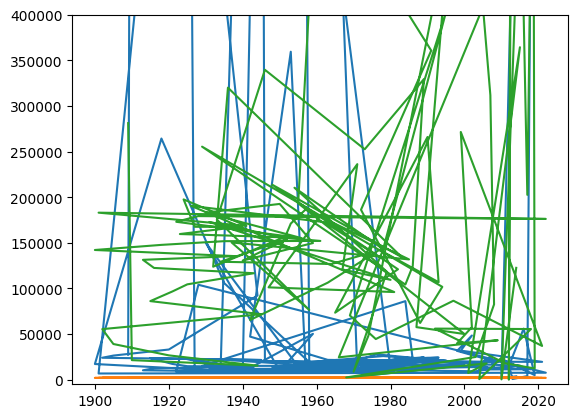

In [8]:
fig, ax = plt.subplots()
#remove NaN Values
noNaN = np.isfinite(mileage) & np.isfinite(price) * np.isfinite(year)
years = (year[noNaN]).unique()
yearmeans = usedcars.groupby(year[noNaN]).mean(numeric_only=True)
print(yearmeans)
ax.plot(years, yearmeans)
plt.ylim(-5000, 400000)

# Box Plot for price

Text(0.5, 1.0, 'Boxplot for the price of used cars')

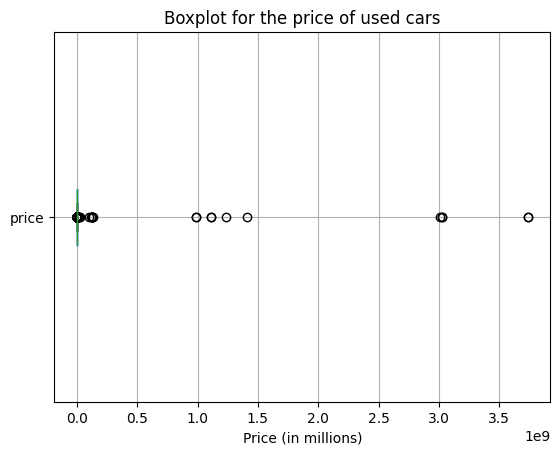

In [9]:
usedcars.boxplot(column=["price"], vert=False, xlabel="Price (in millions)")
plt.title("Boxplot for the price of used cars")

#### As shown by the boxplot, the vast majority of the data points are located among the lower end to the left, meaning the data is tremendously skewed right. Some outliers range from a minimum of about 100,000 dollars to a maximum of around 3.8 million. Seeing as how outliers have a large effect on the mean of the price of used cars, this could be problematic for trying to accurately predict the price of used cars with our inputs

(0.0, 50000.0)

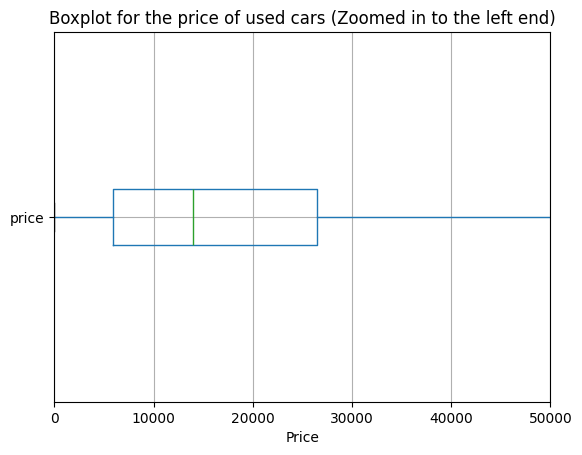

In [10]:
usedcars.boxplot(column=["price"], vert=False, xlabel="Price")
plt.title("Boxplot for the price of used cars (Zoomed in to the left end)")
plt.xlim(0, 50000)

#### Now with a zoomed in view of used car prices at the lower end, ignoring the outliers. The median price for a used car is around 14000 dollars, which is incredibly low compared to the median and maximum prices found at the right end of the boxplot, and shows how troublesome the skewness might be in trying to make our predictions

# Setup for Quadratic Regression testing (To Be Done)

In [11]:

#Remove high price outliers by finding quantiles
#outlier = usedcars["price"].quantile(0.99)
#usedcars = usedcars[["price", "year", "manufacturer", "condition", "cylinders", "odometer", "title_status", "transmission"]][usedcars["price"] < outlier]

Inputs = usedcars[["year", "odometer"]][noNaN]
Price = usedcars["price"][noNaN]
trainerX, testerX, trainerY, testerY = train_test_split(Inputs, Price, test_size=0.192, random_state=27)


In [13]:
"""
PolyRegress = PolynomialFeatures(3)
polyFTrainer = PolyRegress.fit_transform(trainerX)
polyFTester = PolyRegress.fit_transform(testerX)
polyM = linear_model.LinearRegression()
polyM.fit(polyFTrainer, trainerY)
trainerYPredictions = polyM.predict(polyFTrainer)
testerYPredictions = polyM.predict(polyFTester)
# The intercept:
print('Intercept: \n', polyM.intercept_)
# The coefficients
print('Coefficients: \n', polyM.coef_)
# The mean squared error
print(f'Mean squared error: {mean_squared_error(testerYPredictions, testerY)}')
# The coefficient of determination: 1 is perfect prediction
print(f'R-Squared: {r2_score(testerYPredictions, testerY)}')
"""
print("To Be Done")

To Be Done
